# 6. 인공 신경망(Aritificial Neural Network)

이번 챕터에서는 인공 신경망에 대한 전반적인 개념을 이해합니다.

<br>

# 1. 머신 러닝 용어 이해하기

이번 챕터에서는 머신 러닝의 특징들에 대해서 배웁니다. 딥 러닝 또한 머신 러닝에 속하므로, 아래의 머신 러닝의 특징들은 모두 딥 러닝의 특징이기도 합니다.

## 1.1 머신 러닝 모델의 평가

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24987/%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG">
</p>

실제 모델을 평가하기 위해서 데이터를 훈련용, 검증용, 테스트용 이렇게 세 가지로 분리하는 것이 일반적입니다. 다만, 이 책의 목적은 개념 학습이므로 일부 실습에서는 별도로 세 가지로 분리하지 않고 훈련용, 테스트용으로만 분리해서 사용합니다. 그렇다면 훈련용, 테스트용 두 가지로만 나눠서 테스트 데이터로 한 번만 테스트하면 더 편할텐데 굳이 왜 검증용 데이터를 만들어 놓는 것일까요?

검증용 데이터는 모델의 성능을 평가하기 위한 용도가 아니라, 모델의 성능을 조정하기 위한 용도입니다. 더 정확히는 과적합이 되고 있는지 판단하거나 하이퍼파라미터의 조정을 위한 용도입니다. **하이퍼파라미터(초매개변수)** 란 값에 따라서 모델의 성능에 영향을 주는 매개변수들을 말합니다. 반면, 가중치와 편향과 같은 학습을 통해 바뀌어져가는 변수를 이 책에서는 **매개변수**라고 부릅니다.

이 두 값 **하이퍼파라미터**와 **매개변수**의 가장 큰 차이는 **하이퍼파라미터**는 보통 사용자가 직접 정해줄 수 있는 변수라는 점입니다. 선형 회귀 챕터에서 배우게 되는 경사 하강법에서 학습률(learning rate)이 이에 해당되며 딥 러닝에서는 은닉층의 수, 뉴런의 수, 드롭아웃 비율 등이 이에 해당됩니다. 반면 **매개변수**는 사용자가 결정해주는 값이 아니라 모델이 학습하는 과정에서 얻어지는 값입니다. 정리하면 하이퍼파라미터는 사람이 정하는 변수인 반면, 매개변수는 기계가 훈련을 통해서 바꾸는 변수라고 할 수 있으며 이 책에서는 이와 같은 기준으로 변수의 이름을 명명합니다.

훈련용 데이터로 훈련을 모두 시킨 모델은 검증용 데이터를 사용하여 정확도를 검증하며 하이퍼파라미터를 **튜닝(tuning)** 합니다. 또한 이 모델의 매개변수는 검증용 데이터로 정확도가 검증되는 과정에서 점차 검증용 데이터에 점점 맞추어져 가기 시작합니다.

하이퍼파라미터 튜닝이 끝났다면, 이제 검증용 데이터로 모델을 평가하는 것은 적합하지 않습니다. 이제 모델은 검증용 데이터에 대해서도 일정 부분 최적화가 되어있기 때문입니다. 모델에 대한 평가는 모델이 아직까지 보지 못한 데이터로 하는 것이 가장 바람직합니다. 검증이 끝났다면 테스트 데이터를 가지고 모델의 진짜 성능을 평가합니다. 비유하자면 훈련 데이터는 문제지, 검증 데이터는 모의고사, 테스트 데이터는 실력을 최종적으로 평가하는 수능 시험이라고 볼 수 있습니다.

만약, 검증 데이터와 테스트 데이터를 나눌 만큼 데이터가 충분하지 않다면 k-폴드 교차 검증이라는 또 다른 방법을 사용하기도 합니다.

<br>

## 1.2 분류(Classification)와 회귀(Regression)

전부라고는 할 수 없지만, 머신 러닝의 많은 문제는 분류 또는 회귀 문제에 속합니다. 이 책에서는 앞서 머신 러닝 기법 중 선형 회귀(Lineare Regression)과 로지스틱 회귀(Logistic Rgression)를 다루는데 선형 회귀를 통해 회귀 문제에 대해서 학습하고, 로지스틱 회귀를 통해 (이름은 회귀이지만) 분류 문제를 학습합니다.

분류는 또한 이진 분류(Binary Classification)과 다중 클래스 분류(Multi-Class Classification)로 나뉩니다. 엄밀히는 다중 레이블 분류(Multi-lable Classification)라는 또 다른 문제가 존재하지만, 이 책에서는 이진 분류와 다중 클래스 분류만 다룹니다.

### 1. 이진 분류 문제(Binary Classification)

이진 분류는 주어진 입력에 대해서 둘 중 하나의 답을 정하는 문제입니다. 시험 성적에 대해서 합격, 불합격인지 판단하고 메일로부터 정상 메일, 스팸 메일인지를 판단하는 문제 등이 이에 속합니다.

### 2. 다중 클래스 분류(Multi-class Classification)

다중 클래스 분류는 주어진 입력에 대해서 세 개 이상의 정해진 선택지 중에서 답을 정하는 문제입니다. 예를 들어 서점 아르바이트를 하는데 과학, 영어, IT, 학습지, 만화라는 레이블이 각각 붙여져 있는 5개의 책장이 있다고 합시다. 새 책이 입고되면, 이 책은 다섯 개의 책장 중에서 분야에 맞는 적절한 책장에 책을 넣어야 합니다. 이 때의 다섯 개의 선택지를 주로 카테고리 또는 범주 또는 클래스라고 하며, 주어진 입력으로부터 정해진 클래스 중 하나로 판단하는 것을 다중 클래스 분류 문제라고 합니다.

### 3. 회귀 문제(Regression)

회귀 문제는 분류 문제처럼 0 또는 1이나 과학 책장, IT 책장 등과 같이 분리된(비연속적인) 답이 결과가 아니라 연속된 값을 결과로 가집니다. 예를 들어 시험 성적을 예측하는데 5시간 공부하였을 때 80점, 5시간 1분 공부하였을 때는 80.5점, 7시간 공부하였을 때는 90점 등이 나오는 것과 같은 문제가 있습니다. 그 외에도 시계열 데이터를 이용한 주가 예측, 생산량 예측, 지수 예측 등이 이에 속합니다.

<br>

## 1.3 지도 학습(Supervised Learning)과 비지도 학습(Unsupervised Learning)

머신 러닝은 크게 지도 학습, 비지도 학습, 강화 학습으로 나눕니다. 하지만 강화 학습은 이 책의 범위를 벗어나므로 설명하지 않습니다. 또한 이 책은 주로 지도 학습에 대해서 다룹니다.

### 1. 지도 학습

지도 학습이란 레이블(Label)이라는 정답과 함께 학습하는 것을 말합니다. 이는 앞서 2챕터의 데이터의 분리 챕터에서 상세히 설명한 바 있습니다. 레이블이라는 말 외에도 $y$, 실제값 등으로 부르기도 하는데 이 책에서는 이 용어들을 상황에 따라서 바꿔서 사용합니다.

이때 기계는 예측값과 실제값의 차이인 오차를 줄이는 방식으로 학습을 하게 되는데 예측값은 $\hat{y}$과 같이 표현하기도 합니다.

### 2. 비지도 학습

비지도 학습은 기본적으로 목적 데이터(또는 레이블)이 없는 학습 방법입니다. 대표적으로 군집(clustering)이나 차원 축소와 같은 학습 방법들을 비지도 학습이라고 합니다.

### 3. 강화 학습

강화 학습은 이 책에서는 다루지 않는 내용입니다. 강화 학습은 어떤 환경 내에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법입니다. (출처 : 위키 백과)

<br>

## 1.4 샘플(Sample)과 특성(Feature)

많은 머신 러닝 문제가 1개 이상의 독립 변수 $x$를 가지고 종속 변수 $y$를 예측하는 문제입니다. 많은 머신 러닝 모델들, 특히 인공 신경망 모델은 독립 변수, 종속 변수, 가중치, 편향 등을 행렬 연산을 통해 연산하는 경우가 많습니다. 그래서 앞으로 인공 신경망을 배우게되면 훈련 데이터를 행렬로 표현하는 경우를 많이 보게 될 겁니다. 독립 변수 $x$의 행렬을 X라고 하였을 때, 독립 변수의 개수가 n개이고 데이터의 개수가 m인 행렬 X는 다음과 같습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/35821/n_x_m.PNG">
</p>

이때 머신 러닝에서는 하나의 데이터, 하나의 행을 샘플(Sample)이라고 부릅니다. (데이터베이스에서는 레코드라고 부르는 단위입니다.) 종속 변수 $y$를 예측하기 위한 각각의 독립 변수 $x$를 특성(Feature)이라고 부릅니다.

<br>

## 1.5 혼동 행렬(Confusion Matrix)

머신 러닝에서는 맞춘 문제수를 전체 문제수로 나눈 값을 정확도(Accuracy)라고 합니다. 하지만 정확도는 맞춘 결과와 틀린 결과에 대한 세부적인 내용을 알려주지는 않습니다. 이를 위해서 사용하는 것이 혼동 행렬(Confusion Matrix)입니다.

예를 들어 양성(Positive)과 음성(Negative)을 구분하는 이진 분류가 있다고 하였을 때 혼동 행렬은 다음과 같습니다. 각 열은 예측값을 나타내며, 각 행은 실제값을 나타냅니다.

|-|참|거짓|
|---|---|---|
|참|TP|FN|
|거짓|FP|TN|

이를 각각 TP(True Positive), TN(True Negative), FP(False Postivie), FN(False Negative)라고 하는데 True는 정답을 맞춘 경우고 False는 정답을 맞추지 못한 경우입니다. 그리고 Positive와 Negative는 각각 제시했던 정답입니다. 즉, TP는 양성(Postive)이라고 대답하였고 실제로 양성이라서 정답을 맞춘 경우입니다. TN은 음성(Negative)이라고 대답하였는데 실제로 음성이라서 정답을 맞춘 경우입니다.

그럼 FP는 양성이라고 대답하였는데, 음성이라서 정답을 틀린 경우이며 FN은 음성이라고 대답하였는데 양성이라서 정답을 틀린 경우가 됩니다. 그리고 이 개념을 사용하면 또 새로운 개념인 정밀도(Precision)과 재현률(Recall)이 됩니다.


### 1. 정밀도(Precision)

정밀도은 양성이라고 대답한 전체 케이스에 대한 TP의 비율입니다. 즉, 정밀도를 수식으로 표현하면 다음과 같습니다.

$$정밀도 = \frac{TP}{TP + FP}$$

### 2. 재현률(Recall)
재현률은 실제값이 양성인 데이터의 전체 개수에 대해서 TP의 비율입니다. 즉, 양성인 데이터 중에서 얼마나 양성인지를 예측(재현)했는지를 나타냅니다.

$$재현률 = \frac{TP}{TP + FN}$$

<br>

## 1.6 과적합(Overfitting)과 과소 적합(Underfitting)

학생의 입장이 되어 같은 문제지를 과하게 많이 풀어서 문제 번호만 봐도 정답을 맞출 수 있게 되었다고 가정합시다. 그런데 다른 문제지나 시험을 보면 점수가 안 좋다면 그게 의미가 있을까요?

머신 러닝에서 **과적합(Overfitting)**이란 훈련 데이터를 과하게 학습한 경우를 말합니다. 훈련 데이터는 실제로 존재하는 많은 데이터의 일부에 불과합니다. 그런데 기계가 훈련 데이터에 대해서만 과하게 학습하면 테스트 데이터나 실제 서비스에서의 데이터에 대해서는 정확도가 좋지 않은 현상이 발생합니다.

예를 들어 강아지 사진과 고양이 사진을 구분하는 기계가 있을 때, 검은색 강아지 사진 훈련 데이터를 과하게 학습하면 기계는 나중에 가서는 흰색 강아지나, 갈색 강아지를 보고도 강아지가 아니라고 판단하게 됩니다. 이는 훈련 데이터에 대해서 지나친 일반화를 한 상황입니다.

과적합 상황에서는 훈련 데이터에 대해서는 오차가 낮지만, 테스트 데이터에 대해서는 오차가 높아지는 상황이 발생합니다. 아래의 그래프는 과적합 상황에서 발생할 수 있는 훈련 횟수에 따른 훈련 데이터의 오차와 테스트 데이터의 오차의 변화를 보여줍니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/32012/%EC%8A%A4%ED%8C%B8_%EB%A9%94%EC%9D%BC_%EC%98%A4%EC%B0%A8.png">
</p>

X축의 에포크(epoch)는 전체 훈련 데이터에 대한 훈련 횟수를 의미합니다. 위의 그래프는 에포크가 3~4를 넘어가게 되면 과적합이 발생합니다. 위의 그래프는 테스트 데이터에 대한 오차가 점차 증가하는 양상을 보여줍니다. 반대로 말하면 훈련 데이터에 대한 정확도는 높지만, 테스트 데이터는 정확도가 낮은 상황이라고 말할 수도 있습니다. 즉, 테스트 데이터의 오차가 증가하기 전이나, 정확도가 감소하기 전에 훈련을 멈추는 것이 바람직합니다.

과적합 방지를 위해 테스트 데이터의 성능이 낮아지기 전에 훈련을 멈추는 것이 바람직하다고 했는데, 테스트 데이터의 성능이 올라갈 여지가 있음에도 훈련을 덜 한 상태를 반대로 과소적합(Underfitting)이라고 합니다. 과소 적합은 훈련 자체가 부족한 상태이므로 과대 적합과는 달리 훈련 데이터에 대해서도 보통 정확도가 낮다는 특징이 있습니다.

이러한 두 가지 현상을 과적합과 과소 적합이라고 부르는 이유는 머신 러닝에서 학습 또는 훈련이라고 하는 과정을 적합(fitting)이라고도 부를 수 있기 때문입니다. 모델이 주어진 데이터에 대해서 적합해져가는 과정이기 때문입니다.

딥 러닝을 할 때는 과적합을 막을 수 있는 드롭아웃(Dropout), 조기 종료(Early Stopping)과 같은 몇 가지 방법이 존재하는데 이는 인공 신경망 챕터에서 소개합니다.

<br>

# 2. 퍼셉트론(Perceptron)

인공 신경망은 수많은 머신 러닝 방법 중 하나입니다. 하지만 최근 인공 신경망을 복잡하게 쌓아 올린 딥 러닝이 다른 머신 러닝 방법들을 뛰어넘는 성능을 보여주는 사례가 늘면서, 전통적인 머신 러닝과 딥 러닝을 구분해서 이해해야 한다는 목소리가 커지고 있습니다. 딥 러닝을 이해하기 위해서는 우선 인공 신경망에 대한 이해가 필요한데, 이번 챕터에서는 초기의 인공 신경망인 퍼셉트론(Perceptron)에 대해서 이해합니다.

### 5.2.1 퍼셉트론(Perceptron)

퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘입니다. 퍼셉트론은 실제 뇌를 구성하는 신경 세포 뉴런의 동작과 유사한데, 신경 세포 뉴런의 그림을 먼저 보도록 하겠습니다. 뉴런은 가지돌기에서 신호를 받아들이고, 이 신호가 일정치 이상의 크기를 가지면 축삭돌기를 통해서 신호를 전달합니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/%EB%89%B4%EB%9F%B0.PNG">
</p>

이제 다수의 입력을 받는 퍼셉트론의 그림을 보겠습니다. 신경 세포 뉴런의 입력 신호와 출력 신호가 퍼셉트론에서 각각 입력값과 출력값에 해당됩니다.

<p align="center">
<img alt="image" src="">
</p>

$x$는 입력값을 의미하며, $W$는 가중치(Weight), $y$는 출력값입니다. 그림 안의 원은 인공 뉴런에 해당됩니다. 실제 신경 세포 뉴런에서의 신호를 전달하는 축삭돌기의 역할을 퍼셉트론에서는 가중치가 대신합니다. 각각의 인공 뉴런에서 보내진 입력값 $x$는 각각의 가중치 $W$와 함께 종착지인 인공 뉴런에 전달되고 있습니다.

각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미합니다.


$$if \sum_i^{n} W_{i}x_{i} ≥ \theta → y=1$$

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력합니다. 이러한 함수를 계단 함수(Step function)라고 하며, 아래는 그래프는 계단 함수의 하나의 예를 보여줍니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24987/step_function.PNG">
</p>

이때 계단 함수에 사용된 이 임계치값을 수식으로 표현할 때는 보통 세타($Θ$)로 표현합니다. 이를 식으로 표현하면 다음과 같습니다.

$$if \sum_i^{n} W_{i}x_{i} ≥ \theta → y=1$$

$$if \sum_i^{n} W_{i}x_{i} < \theta → y=0$$

단, 위의 식에서 임계치를 좌변으로 넘기고 편향 $b$(bias)로 표현할 수도 있습니다. 편향 $b$ 또한 퍼셉트론의 입력으로 사용됩니다. 보통 그림으로 표현할 때는 입력값이 1로 고정되고 편향 $b$가 곱해지는 변수로 표현됩니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/perceptron2_final.PNG">
</p>

$$if \sum_i^{n} W_{i}x_{i} + b ≥ 0 → y=1$$

$$if \sum_i^{n} W_{i}x_{i} + b < 0 → y=0$$

이 책을 포함한 많은 인공 신경망 자료에서 편의상 편향 $b$가 그림이나 수식에서 생략되서 표현되기도 하지만 실제로는 편향 $b$ 또한 딥 러닝이 최적의 값을 찾아야 할 변수 중 하나입니다.

다음 챕터에서 배우겠지만 이렇게 뉴런에서 출력값을 변경시키는 함수를 활성화 함수(Activation Function)라고 합니다. 초기 인공 신경망 모델인 퍼셉트론은 활성화 함수로 계단 함수를 사용하였지만, 그 뒤에 등장한 여러가지 발전된 신경망들은 계단 함수 외에도 여러 다양한 활성화 함수를 사용하기 시작했습니다. 사실 앞서 배운 시그모이드 함수나 소프트맥스 함수 또한 활성화 함수 중 하나입니다.

퍼셉트론을 배우기 전에 로지스틱 회귀를 먼저 배운 이유도 여기에 있습니다. 퍼셉트론의 활성화 함수는 계단 함수이지만 여기서 활성화 함수를 시그모이드 함수로 변경하면 방금 배운 퍼셉트론은 곧 이진 분류를 수행하는 로지스틱 회귀와 동일함을 알 수 있습니다.

다시 말하면 로지스틱 회귀 모델이 인공 신경망에서는 하나의 인공 뉴런으로 볼 수 있습니다. 로지스틱 회귀를 수행하는 인공 뉴런과 위에서 배운 퍼셉트론의 차이는 오직 활성화 함수의 차이입니다.

*   인공 뉴런 : 활성화 함수 $f(\sum_i^{n} W_{i}x_{i} + b)$
*   위의 퍼셉트론(인공 뉴런 종류 중 하나) : 계단 함수 $f(\sum_i^{n} W_{i}x_{i} + b)$ 

<br>

## 2.2 단층 퍼셉트론(Single-Layer Perceptron)

위에서 배운 퍼셉트론을 단층 퍼셉트론이라고 합니다. 퍼셉트론은 단층 퍼셉트론과 다층 퍼셉트론으로 나누어지는데, 단층 퍼셉트론은 값을 보내는 단계와 값을 받아서 출력하는 두 단계로만 이루어집니다. 이때 이 각 단계를 보통 층(layer)라고 부르며, 이 두 개의 층을 입력층(input layer)과 출력층(output layer)이라고 합니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/perceptron3_final.PNG">
</p>

단층 퍼셉트론의 한계를 개선하기 위해 향후에 나온 다층 퍼셉트론을 배우게 되면 단층과 다층 이 두 퍼셉트론이 어떤 차이를 가지는지 쉽게 이해할 수 있습니다. 단층 퍼셉트론이 어떤 일을 할 수 있으며 한계는 무엇인지 학습해보겠습니다.

단층 퍼셉트론을 이용하면 AND, NAND, OR 게이트를 쉽게 구현할 수 있습니다. 게이트 연산에 쓰이는 것은 두 개의 입력값과 하나의 출력값입니다. 예를 들어 AND 게이트의 경우에는 두 개의 입력 값이 모두 1인 경우에만 출력값이 1이 나오는 구조를 갖고 있습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/andgate.PNG">
</p>

단층 퍼셉트론의 식을 통해 AND 게이트를 만족하는 두 개의 가중치와 편향 값에는 뭐가 있을까요? 각각 w1, w2, b라고 한다면 [0.5, 0.5, -0.7], [0.5, 0.5, -0.8] 또는 [1.0, 1.0, -1.0] 등 이 외에도 다양한 가중치와 편향의 조합이 나올 수 있습니다. 이해를 돕기 위해서 AND 게이트를 위한 매개변수 값을 가진 단층 퍼셉트론의 식을 파이썬 코드로 간단하게 구현해봅시다.

In [1]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

위의 함수에 AND 게이트의 입력값을 모두 넣어보면 오직 두 개의 입력값이 1인 경우에만 1을 출력합니다.

In [2]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

그렇다면 두 개의 입력값이 1인 경우에만 출력값이 0, 나머지 입력값의 쌍(pair)에 대해서는 모두 출력값이 1이 나오는 NAND 게이트는 어떨까요?

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/nandgate.PNG">
</p>

앞서 언급했던 AND 게이트를 충족하는 가중치와 편향값인 [0.5, 0.5, -0.7]에 -를 붙여서 [-0.5, -0.5, +0.7]을 단층 퍼셉트론의 식에 넣어보면 NAND 게이트를 충족합니다. 파이썬 코드를 통해서 이를 확인해봅시다.

In [3]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

단지 같은 코드에 함수 이름과 가중치와 편향만 바꿨을 뿐입니다. 퍼셉트론의 구조는 같기때문입니다.

In [4]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

NAND 게이트를 구현한 파이썬 코드에 입력값을 넣자, 두 개의 입력값이 1인 경우에만 0이 나오는 것을 확인할 수 있습니다. 퍼셉트론으로 NAND 게이트를 구현한 것입니다. [-0.5, -0.5, -0.7] 외에도 퍼셉트론이 NAND 게이트의 동작을 하도록 하는 다양한 가중치와 편향의 값들이 있을 것입니다.

두 개의 입력이 모두 0인 경우에 출력값이 0이고 나머지 경우에는 모두 출력값이 1인 OR 게이트 또한 적절한 가중치 값과 편향 값만 찾으면 단층 퍼셉트론의 식으로 구현할 수 있습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/orgate.PNG">
</p>

예를 들어 각각 가중치와 편향에 대해서 [0.6, 0.6, -0.5]를 선택하면 OR 게이트를 충족합니다.

In [5]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [6]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

물론, 이 외에도 이를 충족하는 다양한 가중치와 편향의 값이 있습니다.

이처럼 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트 또한 구현할 수 있습니다. 하지만 단층 퍼셉트론으로 구현이 불가능한 게이트가 있는데 바로 XOR 게이트입니다. XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다. 위의 파이썬 코드에 아무리 수많은 가중치와 편향을 넣어봐도 XOR 게이트를 구현하는 것은 불가능합니다. 그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문입니다.

예를 들어 AND 게이트에 대한 단층 퍼셉트론을 시각화해보면 다음과 같습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/andgraphgate.PNG">
</p>

그림에서는 출력값 0을 하얀색 원, 1을 검은색 원으로 표현했습니다. AND 게이트를 충족하려면 하얀색 원과 검은색 원을 직선으로 나누게 됩니다. 마찬가지로 NAND 게이트나 OR 게이트에 대해서도 시각화를 했을 때 직선으로 나누는 것이 가능합니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/oragateandnandgate.PNG">
</p>

그렇다면 XOR 게이트는 어떨까요? XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다. XOR 게이트를 시각화해보면 다음과 같습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/xorgraphandxorgate.PNG">
</p>

하얀색 원과 검은색 원을 직선 하나로 나누는 것은 불가능합니다. 즉, 단층 퍼셉트론으로는 XOR 게이트를 구현하는 것이 불가능합니다. 이를 단층 퍼셉트론은 선형 영역에 대해서만 분리가 가능하다고 말합니다. 사실 XOR 게이트는 직선이 아닌 곡선. 비선형 영역으로 분리하면 구현이 가능합니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/xorgate_nonlinearity.PNG">
</p>

위의 그림은 곡선을 사용한다면 하얀색 원과 검은색 원을 나눌 수 있음을 보여줍니다. 이제 XOR 게이트를 만들 수 있는 다층 퍼셉트론에 대해서 알아보도록 하겠습니다.

<br>

## 2.3 다층 퍼셉트론(MultiLayer Perceptron, MLP)

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있습니다. 퍼셉트론 관점에서 말하면, 층을 더 쌓으면 만들 수 있습니다. 다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점입니다. 이렇게 입력층과 출력층 사이에 존재하는 층을 **은닉층(hidden layer)** 이라고 합니다. 즉, 다층 퍼셉트론은 중간에 은닉층이 존재한다는 점이 단층 퍼셉트론과 다릅니다. 다층 퍼셉트론은 줄여서 MLP라고도 부릅니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/perceptron_4image.jpg">
</p>

위의 그림은 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현한 다층 퍼셉트론의 예입니다. (실제 구현은 숙제로 남겨두겠습니다. 힌트를 드리자면 위의 단층 퍼셉트론에서 사용한 함수들을 그대로 사용하면 됩니다.)

In [7]:
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    return AND_gate(s1, s2)

In [8]:
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

XOR 예제에서는 은닉층 1개만으로 문제를 해결할 수 있었지만, 다층 퍼셉트론은 본래 은닉층이 1개 이상인 퍼셉트론을 말합니다. 즉, XOR 문제보다 더욱 복잡한 문제를 해결하기 위해서 다층 퍼셉트론은 중간에 수많은 은닉층을 더 추가할 수 있습니다. 은닉층의 개수는 2개일 수도 있고, 수십 개일수도 있고 사용자가 설정하기 나름입니다. 아래는 더 어려운 문제를 풀기 위해서 은닉층이 하나 더 추가되고(이 경우에는 은닉층이 2개), 뉴런의 개수를 늘린 다층 퍼셉트론의 모습을 보여줍니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/24958/%EC%9E%85%EC%9D%80%EC%B8%B5.PNG">
</p>

위와 같이 은닉층이 2개 이상인 신경망을 **심층 신경망(Deep Neural Network, DNN)** 이라고 합니다. 심층 신경망은 다층 퍼셉트론만 이야기 하는 것이 아니라, 여러 변형된 다양한 신경망들도 은닉층이 2개 이상이 되면 심층 신경망이라고 합니다.

지금까지는 OR, AND, XOR 게이트 등. 퍼셉트론이 가야할 정답을 참고로 퍼셉트론이 정답을 출력할 때까지 가중치를 바꿔보면서 맞는 가중치를 찾았습니다. 즉, 가중치를 수동으로 찾았습니다. 하지만 이제는 기계가 가중치를 스스로 찾아내도록 자동화시켜야하는데, 이것이 머신 러닝에서 말하는 **학습(training)** 단계에 해당됩니다. 앞서 선형 회귀와 로지스틱 회귀에서 보았듯이 **손실 함수(Loss function)** 와 **옵티마이저(Optimizer)** 를 사용합니다. 그리고 만약 학습을 시키는 인공 신경망이 심층 신경망일 경우에는 이를 심층 신경망을 학습시킨다고 하여, **딥 러닝(Deep Learning)** 이라고 합니다.

<br>

# 3. XOR 문제 - 단층 퍼셉트론 구현하기

이번 챕터에서는 파이토치를 사용해서 단층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다.

## 3.1 파이토치로 단층 퍼셉트론 구현하기

우선 필요한 도구를 임포트하고, GPU 연산이 가능할 경우에는 GPU 연산을 할 수 있도록 설정해줍니다.

In [9]:
import torch
import torch.nn as nn

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

이제 XOR 문제에 해당되는 입력과 출력을 정의합니다.

In [11]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

이제 1개의 뉴런을 가지는 단층 퍼셉트론을 구현해봅시다. 단층 퍼셉트론이 처음 소개되었을 때는 계단 함수였지만, 우리는 이미 또 다른 활성화 함수인 시그모이드 함수를 알고 있으므로 시그모이드 함수를 사용해보겠습니다.

In [12]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

0 또는 1을 예측하는 이진 분류 문제이므로 비용 함수로는 크로스엔트로피 함수를 사용합니다. `nn.BCELoss()`는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.

In [13]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [14]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0: # 1000번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273974418640137
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


200번 에포크에 비용이 0.6931471824645996가 출력된 이후에는 10,000번 에포크가 되는 순간까지 더 이상 비용이 줄어들지 않습니다. 이는 단층 퍼셉트론은 XOR 문제를 풀 수 없기 때문입니다.

<br>

## 3.2 학습된 단층 퍼셉트론의 예측값 확인하기

총 10,001회 학습한 단층 퍼셉트론의 예측값도 확인해보겠습니다.

In [15]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


실제값은 0, 1, 1, 0임에도 예측값은 0, 0, 0, 0으로 문제를 풀지 못하는 모습을 보여줍니다.

<br>

# 4. 역전파(BackPropagation)

인공 신경망이 순전파 과정을 진행하여 예측값과 실제값의 오차를 계산하였을 때 어떻게 역전파 과정에서 경사 하강법을 사용하여 가중치를 업데이트하는지 직접 계산을 통해 이해해봅시다.

## 4.1 인공 신경망의 이해(Neural Network Overview)

우선 예제를 위해 사용될 인공 신경망을 소개합니다. 역전파의 이해를 위해서 여기서 사용할 인공 신경망은 입력층, 은닉층, 출력층 이렇게 3개의 층을 가집니다. 또한 해당 인공 신경망은 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용합니다. 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용합니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/37406/nn1_final.PNG">
</p>

위의 그림은 여기서 사용할 인공 신경망의 모습을 보여줍니다. 은닉층과 출력층의 모든 뉴런에서 변수 $z$가 존재하는데 여기서 변수 $z$는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미합니다. 이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태입니다. 즉, 활성화 함수의 입력을 의미합니다. $z$ 우측의 `|` 를 지나서 존재하는 변수 $h$ 또는 $o$는 $z$가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미합니다. 이번 역전파 예제에서는 인공 신경망에 존재하는 모든 가중치 $W$에 대해서 역전파를 통해 업데이트하는 것을 목표로합니다. 해당 인공 신경망은 편향 $b$는 고려하지 않습니다.

<br>

## 4.2 순전파(Forward Propagation)

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/37406/nn2_final_final.PNG">
</p>

주어진 값이 위의 그림과 같을 때 순전파를 진행해봅시다. 위의 그림에서 소수점 앞의 0은 생략하였습니다. 예를 들어 .25는 0.25를 의미합니다. 파란색 숫자는 입력값을 의미하며, 빨간색 숫자는 각 가중치의 값을 의미합니다. 앞으로 진행하는 계산의 결과값은 소수점 아래 여덟번째 자리까지 반올림하여 표기합니다.

각 입력은 입력층에서 은닉층 방향으로 향하면서 각 입력에 해당하는 가중치와 곱해지고, 결과적으로 가중합으로 계산되어 은닉층 뉴런의 시그모이드 함수의 입력값이 됩니다. $z_1$과 $z_2$는 시그모이드 함수의 입력으로 사용되는 각각의 값에 해당됩니다.

$$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.3 \text{×} 0.1 + 0.25 \text{×} 0.2= 0.08$$

$$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.4 \text{×} 0.1 + 0.35 \text{×} 0.2= 0.11$$

$z_1$과 $z_2$는 각각의 은닉층 뉴런에서 시그모이드 함수를 지나게 되는데 시그모이드 함수가 리턴하는 결과값은 은닉층 뉴런의 최종 출력값입니다. 식에서는 각각 $h_1$과 $h_2$에 해당되며, 아래의 결과와 같습니다.

$$h_{1}=sigmoid(z_{1}) = 0.51998934$$

$$h_{2}=sigmoid(z_{2}) = 0.52747230$$

$h_1$과 $h_2$ 이 두 값은 다시 출력층의 뉴런으로 향하게 되는데 이때 다시 각각의 값에 해당되는 가중치와 곱해지고, 다시 가중합 되어 출력층 뉴런의 시그모이드 함수의 입력값이 됩니다. 식에서는 각각 $z_3$과 $z_4$에 해당됩니다.

$$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.45 \text{×} h_{1} + 0.4 \text{×} h_{2} = 0.44498412$$

$$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.7 \text{×} h_{1} + 0.6 \text{×} h_{2} = 0.68047592$$

$z_3$과 $z_4$이 출력층 뉴런에서 시그모이드 함수를 지난 값은 이 인공 신경망이 최종적으로 계산한 출력값입니다. 실제값을 예측하기 위한 값으로서 예측값이라고도 부릅니다.

$$o_{1}=sigmoid(z_{3})=0.60944600$$

$$o_{2}=sigmoid(z_{4})=0.66384491$$

이제 해야할 일은 예측값과 실제값의 오차를 계산하기 위한 오차 함수를 선택하는 것입니다. 오차(Error)를 계산하기 위한 손실 함수(Loss function)로는 평균 제곱 오차 MSE를 사용합니다. 식에서는 실제값을 target이라고 표현하였으며, 순전파를 통해 나온 예측값을 output으로 표현하였습니다. 그리고 각 오차를 모두 더하면 전체 오차 $E_{total}$가 됩니다.

$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02193381$

$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00203809$

$E_{total}=E_{o1}+E_{o2}=0.02397190$

<br>

## 4.3 역전파 1단계(BackPropagation Step 1)

순전파가 입력층에서 출력층으로 향한다면 역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트해갑니다. 출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 출력층과 N층 사이의 가중치를 업데이트하는 단계를 역전파 1단계, 그리고 N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계라고 해봅시다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/37406/nn3_final.PNG">
</p>

역전파 1단계에서 업데이트 해야 할 가중치는 $W_5,W_6,W_7,W_{8}$ 총 4개입니다. 원리 자체는 동일하므로 우선 $W_{5}$에 대해서 먼저 업데이트를 진행해보겠습니다. 경사 하강법을 수행하려면 가중치 $W_{5}$를 업데이트 하기 위해서 $ \frac{\partial E_{total}}{\partial W_{5}}$를 계산해야 합니다.

$\frac{\partial E_{total}}{\partial W_{5}}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있습니다.

$$\frac{\partial E_{total}}{\partial W_{5}} = \frac{\partial E_{total}}{\partial o_{1}} \text{×} \frac{\partial o_{1}}{\partial z_{3}} \text{×} \frac{\partial z_{3}}{\partial W_{5}}$$

위의 식에서 우변의 세 개의 각 항에 대해서 순서대로 계산해봅시다. 우선 첫번째 항에 대해서 계산해보겠습니다. 미분을 진행하기 전에 $E_{total}$의 값을 상기해봅시다. $E_{total}$은 앞서 순전파를 진행하고 계산했던 전체 오차값입니다. 식은 다음과 같습니다.

$$E_{total}=\frac{1}{2}(target_{o1}-output_{o1})^{2} + \frac{1}{2}(target_{o2}-output_{o2})^{2}$$

이에 $\frac{\partial E_{total}}{\partial o_{1}}$는 다음과 같습니다.

$$\frac{\partial E_{total}}{\partial o_{1}}=2 \text{×} \frac{1}{2}(target_{o1}-output_{o1})^{2-1} \text{×} (-1) + 0$$

<br>

$$\frac{\partial E_{total}}{\partial o_{1}}=-(target_{o1}-output_{o1})=-(0.4-0.60944600)=0.20944600$$

이제 두번째 항을 주목해봅시다. $o_1$이라는 값은 시그모이드 함수의 출력값입니다. 그런데 시그모이드 함수의 미분은 $f(x)$x$(1-f(x))$입니다. 앞으로의 계산 과정에서도 계속해서 시그모이드 함수를 미분해야 하는 상황이 생기므로 기억해둡시다. 이에 따라서 두번째 항의 미분 결과는 다음과 같습니다.

(시그모이드 함수 미분 참고 링크 : https://en.wikipedia.org/wiki/Logistic_function#Derivative)

$$\frac{\partial o_{1}}{\partial z_{3}}=o_{1}\text{×}(1-o_{1})=0.60944600(1-0.60944600)=0.23802157$$

마지막으로 세번째 항은 $h_1$의 값과 동일합니다.

$$\frac{\partial z_{3}}{\partial W_{5}}=h_{1}=0.51998934$$

우변의 모든 항을 계산하였습니다. 이제 이 값을 모두 곱해주면 됩니다.

$$\frac{\partial E_{total}}{\partial W_{5}} = 0.20944600 \text{×} 0.23802157 \text{×} 0.51998934 = 0.02592286$$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 때가 왔습니다! 하이퍼파라미터에 해당되는 학습률(learning rate) $\alpha$ 는 0.5라고 가정합니다.

$$W_{5}^{+}=W_{5}-\alpha \frac{\partial E_{total}}{\partial W_{5}}=0.45- 0.5 \text{×} 0.02592286=0.43703857$$

이와 같은 원리로 $W_{6}^{+},\ W_{7}^{+},\ W_{8}^{+}$을 계산할 수 있습니다.

$$\frac{\partial E_{total}}{\partial W_{6}} = \frac{\partial E_{total}}{\partial o_{1}} \text{×} \frac{\partial o_{1}}{\partial z_{3}} \text{×} \frac{\partial z_{3}}{\partial W_{6}} → W_{6}^{+}=0.38685205$$

$$\frac{\partial E_{total}}{\partial W_{7}} = \frac{\partial E_{total}}{\partial o_{2}} \text{×} \frac{\partial o_{2}}{\partial z_{4}} \text{×} \frac{\partial z_{4}}{\partial W_{7}} → W_{7}^{+}=0.69629578$$

$$\frac{\partial E_{total}}{\partial W_{8}} = \frac{\partial E_{total}}{\partial o_{2}} \text{×} \frac{\partial o_{2}}{\partial z_{4}} \text{×} \frac{\partial z_{4}}{\partial W_{8}} → W_{8}^{+}=0.59624247$$

<br>

## 4.4 역전파 2단계(BackPropagation Step 2)

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/37406/nn4.PNG">
</p>

1단계를 완료하였다면 이제 입력층 방향으로 이동하며 다시 계산을 이어갑니다. 위의 그림에서 빨간색 화살표는 순전파의 정반대 방향인 역전파의 방향을 보여줍니다. 현재 인공 신경망은 은닉층이 1개밖에 없으므로 이번 단계가 마지막 단계입니다. 하지만 은닉층이 더 많은 경우라면 입력층 방향으로 한 단계씩 계속해서 계산해가야 합니다.

이번 단계에서 계산할 가중치는 $W_{1}, W_{2}, W_{3}, W_{4}$입니다. 원리 자체는 동일하므로 우선 $W_1$에 대해서 먼저 업데이트를 진행해보겠습니다. 경사 하강법을 수행하려면 가중치$W_1$를 업데이트 하기 위해서 $\frac{\partial E_{total}}{\partial W_{1}}$를 계산해야 합니다.

$\frac{\partial E_{total}}{\partial W_{1}}$ 를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있습니다.

$$\frac{\partial E_{total}}{\partial W_{1}} = \frac{\partial E_{total}}{\partial h_{1}} \text{×} \frac{\partial h_{1}}{\partial z_{1}} \text{×} \frac{\partial z_{1}}{\partial W_{1}}$$

위의 식에서 우변의 첫번째항인 $\frac{\partial E_{total}}{\partial h_{1}}$ 는 다음과 같이 다시 식을 풀어서 쓸 수 있습니다.

$$\frac{\partial E_{total}}{\partial h_{1}} = \frac{\partial E_{o1}}{\partial h_{1}} + \frac{\partial E_{o2}}{\partial h_{1}}$$

위의 식의 우변의 두 항을 각각 구해봅시다. 우선 첫번째 항 $\frac{\partial E_{o1}}{\partial h_{1}}$ 에 대해서 항을 분해 및 계산해보겠습니다.

$$\frac{\partial E_{o1}}{\partial h_{1}} = \frac{\partial E_{o1}}{\partial z_{3}} \text{×} \frac{{\partial z_{3}}}{\partial h_{1}} = \frac{\partial E_{o1}}{\partial o_{1}} \text{×} \frac{\partial o_{1}}{\partial z_{3}} \text{×} \frac{{\partial z_{3}}}{\partial h_{1}}$$

$$= -(target_{o1}-output_{o1}) \text{×} o_{1}\text{×}(1-o_{1}) \text{×} W_{5}$$

$$= 0.20944600 \text{×} 0.23802157 \text{×} 0.45 = 0.02243370$$

이와 같은 원리로 $\frac{\partial E_{o2}}{\partial h_{1}}$ 또한 구합니다.

$$\frac{\partial E_{o2}}{\partial h_{1}} = \frac{\partial E_{o2}}{\partial z_{4}} \text{×} \frac{{\partial z_{4}}}{\partial h_{1}} = \frac{\partial E_{o2}}{\partial o_{2}} \text{×} \frac{\partial o_{2}}{\partial z_{4}} \text{×} \frac{{\partial z_{4}}}{\partial h_{1}} = 0.00997311$$

<br>

$$\frac{\partial E_{total}}{\partial h_{1}} = 0.02243370 + 0.00997311 = 0.03240681$$

이제 $\frac{\partial E_{total}}{\partial W_{1}}$ 를 구하기 위해서 필요한 첫번째 항을 구했습니다. 나머지 두 항에 대해서 구해보도록 하겠습니다.

$$\frac{\partial h_{1}}{\partial z_{1}} = h_{1}\text{×}(1-h_{1}) = 0.51998934(1-0.51998934)=0.24960043$$

$$\frac{\partial z_{1}}{\partial W_{1}} = x_{1} = 0.1$$

즉, $\frac{\partial E_{total}}{\partial W_{1}}$ 는 다음과 같습니다.

$$\frac{\partial E_{total}}{\partial W_{1}} = 0.03240681 \text{×} 0.24960043 \text{×} 0.1 = 0.00080888$$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 수 있습니다.

$$W_{1}^{+}=W_{1}-\alpha \frac{\partial E_{total}}{\partial W_{1}}=0.1- 0.5 \text{×} 0.00080888=0.29959556$$

이와 같은 원리로 $W_{2}^{+},\ W_{3}^{+},\ W_{4}^{+}$ 을 계산할 수 있습니다.

$$\frac{\partial E_{total}}{\partial W_{2}} = \frac{\partial E_{total}}{\partial h_{1}} \text{×} \frac{\partial h_{1}}{\partial z_{1}} \text{×} \frac{\partial z_{1}}{\partial W_{2}} → W_{2}^{+}=0.24919112$$

$$\frac{\partial E_{total}}{\partial W_{3}} = \frac{\partial E_{total}}{\partial h_{2}} \text{×} \frac{\partial h_{2}}{\partial z_{2}} \text{×} \frac{\partial z_{2}}{\partial W_{3}} → W_{3}^{+}=0.39964496$$

$$\frac{\partial E_{total}}{\partial W_{4}} = \frac{\partial E_{total}}{\partial h_{2}} \text{×} \frac{\partial h_{2}}{\partial z_{2}} \text{×} \frac{\partial z_{2}}{\partial W_{4}} → W_{4}^{+}=0.34928991$$

<br>

## 4.5 결과 확인

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/37406/nn1_final.PNG">
</p>

업데이트 된 가중치에 대해서 다시 한 번 순전파를 진행하여 오차가 감소하였는지 확인해보겠습니다.

$$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.29959556 \text{×} 0.1 + 0.24919112 \text{×} 0.2= 0.07979778$$

$$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.39964496 \text{×} 0.1 + 0.34928991 \text{×} 0.2= 0.10982248$$

$$h_{1}=sigmoid(z_{1}) = 0.51993887$$

$$h_{2}=sigmoid(z_{2}) = 0.52742806$$

$$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.43703857 \text{×} h_{1} + 0.38685205 \text{×} h_{2} = 0.43126996$$

$$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.69629578 \text{×} h_{1} + 0.59624247 \text{×} h_{2} = 0.67650625$$

$$o_{1}=sigmoid(z_{3})=0.60617688$$

$$o_{2}=sigmoid(z_{4})=0.66295848$$

$$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02125445$$

$$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00198189$$

<br>

$$E_{total}=E_{o1}+E_{o2}=0.02323634$$

기존의 전체 오차 $E_{total}$ 가 0.02397190였으므로 1번의 역전파로 오차가 감소한 것을 확인할 수 있습니다. 인공 신경망의 학습은 오차를 최소화하는 가중치를 찾는 목적으로 순전파와 역전파를 반복하는 것을 말합니다.

<br>

# 5. XOR 문제 - 다층 퍼셉트론 구현하기

이번 챕터에서는 파이토치를 사용해서 다층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다. 파이토치에서는 앞에서 배운 역전파가 아래의 두 줄의 코드로서 구현됩니다.

## 5.1 파이토치로 다층 퍼셉트론 구현하기

In [16]:
import torch
import torch.nn as nn

GPU 연산이 가능하다면 GPU 연산을 하도록 하고, 랜덤 시드를 고정해줍니다.

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

XOR 문제를 풀기 위한 입력과 출력을 정의해줍니다.

In [18]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

이제 다층 퍼셉트론을 설계합니다. 아래는 입력층, 은닉층1, 은닉층2, 은닉층3, 출력층을 가지는 은닉층이 3개인 인공 신경망입니다.

In [19]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

위 인공 신경망을 그림으로 표현하면 아래와 같습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/61010/ann.PNG">
</p>

이제 비용 함수와 옵타마이저를 선언합니다. `nn.BCELoss()`는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.

In [20]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

총 10,001번의 에포크를 수행합니다. 각 에포크마다 역전파가 수행된다고 보면 되겠습니다.

In [21]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 1000의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 1000 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
1000 0.6931380033493042
2000 0.6931171417236328
3000 0.6930763125419617
4000 0.6929103136062622
5000 0.6820826530456543
6000 0.0013030902482569218
7000 0.0004837677988689393
8000 0.00028906602528877556
9000 0.00020382460206747055
10000 0.00015651952708140016


비용이 최소화 되는 방향으로 가중치와 편향이 업데이트 됩니다. 1000배수의 에포크마다 비용이 줄어드는 과정을 보여줍니다.

<br>

## 5.2 학습된 다층 퍼셉트론의 예측값 확인하기

이제 모델이 XOR 문제를 풀 수 있는지 테스트 해봅시다.

In [22]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1170453e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8533139e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


실제값은 0, 1, 1, 0이며 예측값은 0, 1, 1, 0으로 문제를 해결하는 모습을 보여줍니다.

<br>

# 6. 비선형 활성화 함수(Activation function)

비선형 활성화 함수(Activation function)는 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수입니다. 앞서 배운 시그모이드 함수나 소프트맥스 함수는 대표적인 활성화 함수 중 하나입니다.

이번 챕터에서는 인공 신경망의 은닉층에서 왜 활성화 함수로 시그모이드(sigmoid) 함수를 사용하는 것을 왜 지양해야 하는지와 은닉층에서 주로 사용되는 함수인 렐루(ReLU) 함수를 소개하고 그 외의 다른 활성화 함수들에 대해서도 소개합니다.

이번 챕터에서는 그래프를 직접 그리면서 이해해보겠습니다. 우선 아래의 도구들을 모두 임포트했다고 가정합니다.

In [23]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

## 6.1 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점입니다. 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 합니다. 예를 들어 $f(x)=Wx+b$라는 함수가 있을 때, $W$와 $b$는 상수입니다. 이 식은 그래프를 그리면 직선이 그려집니다. 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말합니다.

인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다. 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다. 예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정해보겠습니다. 활성화 함수는 $f(x)=Wx$라고 가정합니다. 여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서 $y(x)=f(f(f(x)))$가 됩니다. 이를 식으로 표현하면 $W$x$W$x$W$x$x$입니다. 그런데 이는 잘 생각해보면 W의 세 제곱값을 $k$라고 정의해버리면 $y(x)=kx$와 같이 다시 표현이 가능합니다. **즉, 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없습니다.**

선형 함수를 사용한 은닉층을 1회 추가한 것과 연속으로 추가한 것이 차이가 없다는 뜻이지, 선형 함수를 사용한 층이 아무 의미가 없다는 뜻이 아닙니다. 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있습니다. 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현하기도 합니다. 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)입니다.

<br>

## 6.2 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수를 사용한 어떤 인공 신경망이 있다고 가정해보겠습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/60683/simple-neural-network.png">
</p>

위 인공 신경망의 학습 과정은 다음과 같습니다. 우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 역전파(back propagation)를 수행합니다.

시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생합니다.

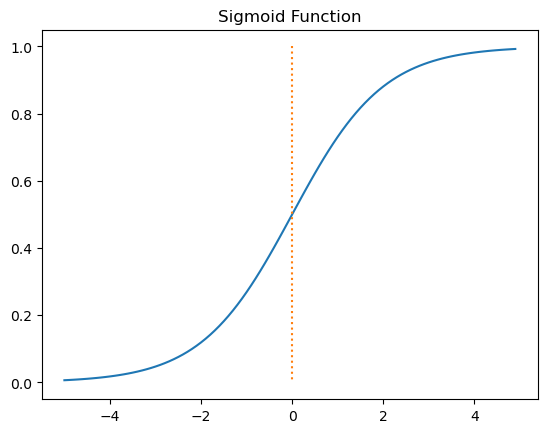

In [24]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 시그모이드 함수의 그래프를 보여줍니다. 위 그래프를 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있습니다. 기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/60683/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%982.PNG">
</p>

주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 됩니다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 됩니다. 이러한 현상을 **기울기 소실(Vanishing Gradient) 문제**라고 합니다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다. 다시 말해 매개변수 $W$가 업데이트 되지 않아 학습이 되지를 않습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/60683/%EA%B8%B0%EC%9A%B8%EA%B8%B0_%EC%86%8C%EC%8B%A4.png">
</p>

위의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여줍니다. 결론적으로 시그모이드 함수를 은닉층에서 사용하는 것은 지양됩니다.

<br>

## 6.3 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 그래프를 그려보겠습니다.

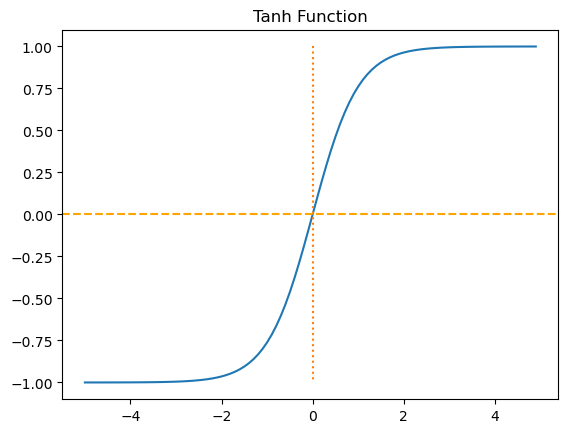

In [25]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생합니다. 그러나 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 큽니다. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편입니다. 그래서 은닉층에서 시그모이드 함수보다는 많이 사용됩니다.

<br>

## 6.4 렐루 함수(ReLU)

인공 신경망에서 가장 최고의 인기를 얻고 있는 함수입니다. 수식은 $f(x)=max(0,x)$로 아주 간단합니다.

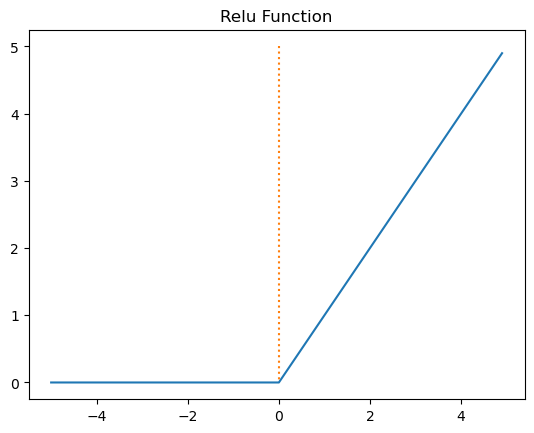

In [26]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환합니다. 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동합니다. 뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠릅니다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 됩니다. 그리고 이 뉴런은 다시 회생하는 것이 매우 어렵습니다. 이 문제를 죽은 렐루(dying ReLU)라고 합니다.

<br>

## 6.5 리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개합니다. Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다.

수식은 $f(x)=max(ax,x)$로 아주 간단합니다. a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가집니다. 여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있습니다.

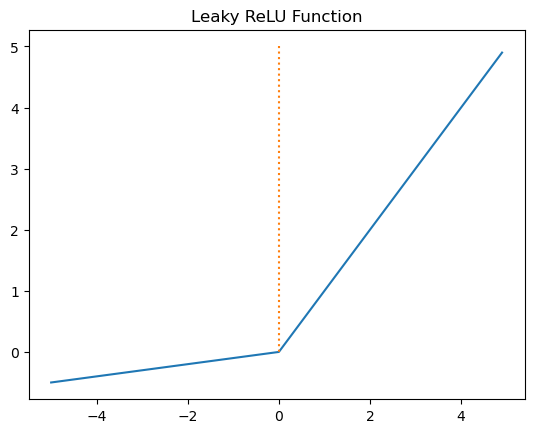

In [27]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았습니다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않습니다.

<br>

## 6.6 소프트맥스 함수(Softamx function)

은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 사용되지 않는다는 의미는 아닙니다. 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용합니다.

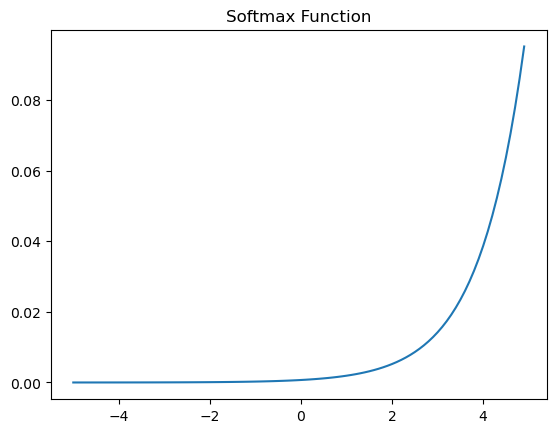

In [28]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다.

## 6.7 출력층의 활성화 함수와 오차 함수의 관계

은닉층의 활성화 함수로는 ReLU 또는 Leaky ReLU와 같은 ReLU의 변형을 사용하라고 정리해봤습니다. 그렇다면 출력층은 어떨까요? 각 문제에 따른 출력층의 활성화 함수와 비용 함수의 관계를 정리해보면 다음과 같습니다. 이 외에도 다중 레이블 분류도 있지만 여기서는 다루지 않겠습니다.

|문제|활성화 함수|비용 함수|
|---|---|---|
|이진 분류|시그모이드|`nn.BCELoss()`|
|다중 클래스 분류|소프트맥스|`nn.CrossEntropyLoss()`|
|회귀|없음|`nn.MSELoss()`|

주의할 점은 `nn.CrossEntropyLoss()`는 소프트맥스 함수를 이미 포함하고 있습니다.

참고 자료 : https://excelsior-cjh.tistory.com/177

* 시그모이드 함수의 또 다른 문제점은 원점 중심이 아니라는 점입니다(Not zero-centered). 따라서, 평균이 0이 아니라 0.5이며, 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높습니다. 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 기울기 소실 문제가 일어날 수 있습니다.

* 하이퍼볼릭탄젠트 함수는 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동은 일어나지 않습니다. 하지만, 하이퍼볼릭탄젠트 함수 또한 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되는데 시그모이드 함수와 마찬가지로 이때 기울기가 완만해지므로 역시나 기울기 소실 문제가 일어날 수 있습니다.

* 스탠포드 대학교의 딥 러닝 강의 cs231n에서는 ReLU를 먼저 시도해보고, 그다음으로 LeakyReLU나 ELU 같은 ReLU의 변형들을 시도해보며, sigmoid는 사용하지 말라고 권장합니다.

<br>

# 7. 다층 퍼셉트론으로 손글씨 분류하기

이번 챕터에서는 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 숫자 필기 데이터를 분류해봅시다.

* MNIST 데이터랑 다른 데이터입니다.

## 7.1 숫자 필기 데이터 소개

숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 `load_digits()` 명령으로 로드할 수 있습니다. 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 그리고 해당 이미지가 1,797개가 있습니다.

`load_digits()`를 통해 이미지 데이터를 로드할 수 있습니다. 로드한 전체 데이터를 digits에 저장합니다.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
import sklearn
from sklearn.datasets import load_digits

digits = load_digits() # 1,979개의 이미지 데이터 로드

첫번째 샘플을 출력해보겠습니다. `.images[인덱스]`를 사용하면 해당 인덱스의 이미지를 행렬로서 출력할 수 있습니다.

In [30]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


첫번째 샘플이 8 × 8 행렬로 출력된 것을 볼 수 있습니다. 0을 흰색 도화지, 0보다 큰 숫자들을 검은색 점이라고 상상해보면 숫자 0의 실루엣처럼 보입니다. 실제로 레이블도 숫자 0인지 첫번째 샘플의 레이블을 확인해봅시다.

In [31]:
print(digits.target[0])

0


첫번째 샘플의 레이블은 0인 것을 확인할 수 있습니다. 이런 샘플이 몇 개 있는지 확인해봅시다.

In [32]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


전체 샘플의 개수는 1,797개입니다. 전체 샘플 중에서 상위 5개의 샘플만 시각화해봅시다.

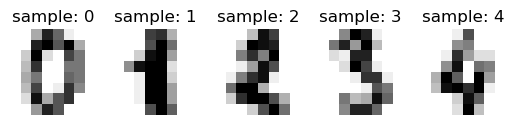

In [33]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

상위 5개의 샘플을 시각화해봤는데, 순서대로 숫자 0, 1, 2, 3, 4의 손글씨인 것처럼 보입니다. 상위 5개 샘플의 레이블을 확인해보겠습니다.

In [34]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


이제 훈련 데이터와 레이블을 각각 `X`, `Y`에 저장해봅시다. `digits.images`는 모든 샘플을 8 × 8 행렬로 저장하고 있습니다.

더 나은 방법은 `digts.data`를 사용하는 것입니다. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태입니다. `digits.data`를 이용해서 첫번째 샘플을 출력해보겠습니다.

In [35]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


8 × 8 행렬이 아니라 64차원의 벡터로 저장된 것을 볼 수 있습니다. 이를 `X`로 저장하고, 레이블을 `Y`에 저장합니다.

In [36]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

<br>

## 7.2 다층 퍼셉트론 분류기 만들기

In [37]:
import torch
import torch.nn as nn
from torch import optim

In [38]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [39]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [40]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())

In [41]:
losses = []

for epoch in range(200):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.381846
Epoch   10/100 Cost: 2.086940
Epoch   20/100 Cost: 1.844468
Epoch   30/100 Cost: 1.555474
Epoch   40/100 Cost: 1.246411
Epoch   50/100 Cost: 0.968091
Epoch   60/100 Cost: 0.724376
Epoch   70/100 Cost: 0.519714
Epoch   80/100 Cost: 0.380597
Epoch   90/100 Cost: 0.293385
Epoch  100/100 Cost: 0.237572
Epoch  110/100 Cost: 0.199540
Epoch  120/100 Cost: 0.171730
Epoch  130/100 Cost: 0.150196
Epoch  140/100 Cost: 0.132554
Epoch  150/100 Cost: 0.117777
Epoch  160/100 Cost: 0.105100
Epoch  170/100 Cost: 0.094198
Epoch  180/100 Cost: 0.084712
Epoch  190/100 Cost: 0.076471


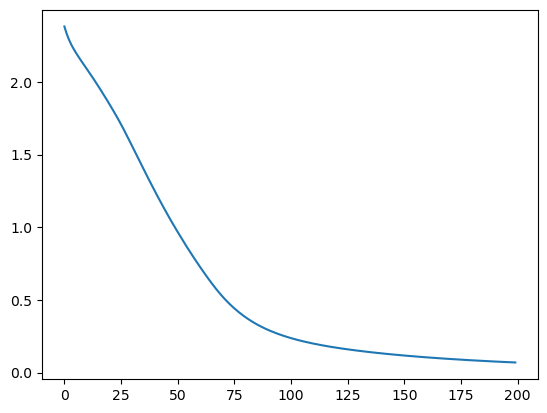

In [42]:
plt.plot(losses)
plt.show()

<br>

# 8. 다층 퍼셉트론으로 MNIST 분류하기

앞서 소프트맥스 회귀로 MNIST 데이터를 분류하는 실습을 해봤습니다. 소프트맥스 회귀 또한 인공 신경망이라고 볼 수 있는데, 입력층과 출력층만 존재하므로 소프트맥스 함수를 활성화 함수로 사용한 '단층 퍼셉트론'이라고 할 수 있습니다. 이번 챕터에서는 은닉층을 추가로 넣어 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 MNIST 데이터를 분류해봅시다.

## 8.1 데이터 로드하기

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [44]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [45]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [46]:
mnist.target[0]

'5'

In [47]:
mnist.target = mnist.target.astype(np.int8)

In [48]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [49]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [50]:
y[0]

5

이 이미지 데이터의 레이블은 5이다


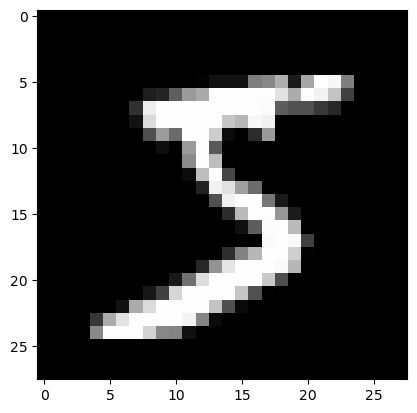

In [51]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

<br>

## 8.2 훈련 데이터와 테스트 데이터의 분리

In [52]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

<br>

## 8.3 다층 퍼셉트론

In [54]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [55]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [56]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [57]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [58]:
test()


테스트 데이터에서 예측 정확도: 972/10000 (10%)



In [59]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9539/10000 (95%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


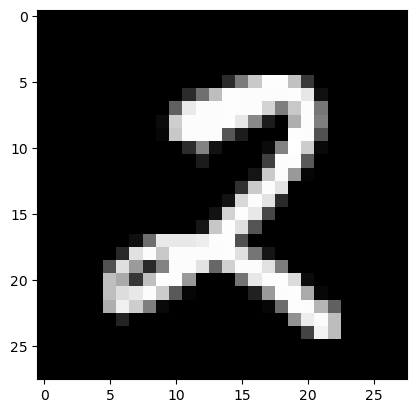

In [60]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')

print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

<br>

# 9. 과적합(Overfitting)을 막는 방법들

학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어트리는 주요 이슈입니다. 모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터. 즉, 검증 데이터나 테스트 데이터에 대해서는 제대로 동작하지 않습니다. 이는 모델이 학습 데이터를 불필요할정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석할 수 있습니다. 이번 챕터에서는 모델의 과적합을 막을 수 있는 여러가지 방법에 대해서 논의합니다.

특히 이 책은 딥 러닝을 다루고 있으므로, 인공 신경망의 과적합을 막는 방법에 초점을 둡니다.

## 9.1 데이터의 양을 늘리기

모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로 과적합 현상이 발생할 확률이 늘어납니다. 그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있습니다.

만약, 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 합니다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킵니다.

<br>

## 9.2 모델의 복잡도 줄이기

인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정됩니다. 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것 입니다. 예를 들어보겠습니다.

다음과 같이 클래스를 사용하여 구현한 인공 신경망이 있다고 가정해봅시다.

In [61]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

위 인공 신경망은 3개의 선형 레이어(Linear)를 가지고 있습니다. 위 인공 신경망이 입력 데이터에 과적합 현상을 보인다면, 다음과 같이 인공 신경망의 복잡도를 줄일 수 있습니다.

In [62]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

위 인공 신경망은 2개의 선형 레이어(Linear)를 가지고 있습니다.

**인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 수용력(capacity)이라고 하기도 합니다.**

<br>

## 9.3 가중치 규제(Regularization) 적용하기

복잡한 모델이 간단한 모델보다 과적합될 가능성이 높습니다. 그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말합니다. 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularizaiton)가 있습니다.

* L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.
* L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.

L1 규제는 기존의 비용 함수에 모든 가중치에 대해서 $\lambda \mid w \mid$를 더 한 값을 비용 함수로 하고, L2 규제는 기존의 비용 함수에 모든 가중치에 대해서 $\frac{1}{2} \lambda w^2$를 더 한 값을 비용 함수로 합니다. $\lambda$는 규제의 강도를 정하는 하이퍼파라미터입니다. $\lambda$가 크다면 모델이 훈련 데이터에 대해서 적합한 매개 변수를 찾는 것보다 규제를 위해 추가된 항들을 작게 유지하는 것을 우선한다는 의미가 됩니다.

이 두 식 모두 비용 함수를 최소화하기 위해서는 가중치 $w$들의 값이 작아져야 한다는 특징이 있습니다. L1 규제로 예를 들어봅시다. L1 규제를 사용하면 비용 함수가 최소가 되게 하는 가중치와 편향을 찾는 동시에 가중치들의 절대값의 합도 최소가 되어야 합니다. 이렇게 되면, 가중치 $w$의 값들은 0 또는 0에 가까이 작아져야 하므로 어떤 특성들은 모델을 만들 때 거의 사용되지 않게 됩니다.

예를 들어 $H(x) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + w_{4}x_{4}$ 라는 수식이 있다고 해봅시다. 여기에 L1 규제를 사용하였더니, $w_3$의 값이 0이 되었다고 해봅시다. 이는 $x_3$ 특성은 사실 모델의 결과에 별 영향을 주지 못하는 특성임을 의미합니다.

L2 규제는 L1 규제와는 달리 가중치들의 제곱을 최소화하므로 $w$의 값이 완전히 0이 되기보다는 0에 가까워지는 경향을 띕니다. L1 규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용합니다. 만약, 이런 판단이 필요없다면 경험적으로는 L2 규제가 더 잘 동작하므로 L2 규제를 더 권장합니다. 인공 신경망에서 L2 규제는 가중치 감쇠(weight decay)라고도 부릅니다.

파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2 규제를 적용합니다. weight_decay 매개변수의 기본값은 0입니다. weight_decay 매개변수에 다른 값을 설정할 수도 있습니다.

```py
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
```

<br>

## 9.4 드롭아웃(Dropout)

드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법입니다.

예를 들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용합니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/60751/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83.PNG">
</p>

드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적입니다. 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지합니다.

<br>

# 10. 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있습니다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다. 이를 **기울기 소실(Gradient Vanishing)** 이라고 합니다.

반대의 경우도 있습니다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 이를 **기울기 폭주(Gradient Exploding)** 이라고 하며, 뒤에서 배울 순환 신경망(Recurrent Neural Network, RNN)에서 발생할 수 있습니다.

이번 챕터에서는 기울기 소실 또는 기울기 폭주를 막는 방법들에 대해서 다룹니다.

## 10.1 ReLU와 ReLU의 변형들

앞에서 배운 내용을 간단히 복습해봅시다. 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워집니다. 그래서 역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈 수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생할 수 있습니다.

기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것입니다.

* 은닉층에서는 시그모이드 함수를 사용하지 마세요.
* Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.
* 은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.

<br>

## 10.2 가중치 초기화(Weight initialization)

같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 합니다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.

### 1. 세이비어 초기화(Xavier Initialization)

2010년 세이비어 글로럿과 요슈아 벤지오는 가중치 초기화가 모델에 미치는 영향을 분석하여 새로운 초기화 방법을 제안했습니다. 이 초기화 방법은 제안한 사람의 이름을 따서 **세이비어(Xavier Initialization) 초기화** 또는 글로럿 초기화(Glorot Initialization)라고 합니다.

이 방법은 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세웁니다. 이전 층의 뉴런의 개수를 $n_{in}$, 다음 층의 뉴런의 개수를 $n_{out}$이라고 해봅시다.

글로럿과 벤지오의 논문에서는 균등 분포를 사용하여 가중치를 초기화할 경우 다음과 같은 균등 분포 범위를 사용하라고 합니다.

$$W \sim Uniform(-\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }}, +\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }})$$

다시 말해 $\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }}$ 를  $m$ 이라고 하였을 때, $-m$과 +$m$ 사이의 균등 분포를 의미합니다.

<br>
정규 분포로 초기화할 경우에는 평균이 $0$이고, 표준 편차 $σ$가 다음을 만족하도록 합니다.

$$\sigma=\sqrt{\frac { 2 }{ { n }_{ in }+{ n }_{ out } } }$$

세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막습니다. 그런데 세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않습니다. ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우에는 다른 초기화 방법을 사용하는 것이 좋은데, 이를 **He 초기화(He initialization)** 라고 합니다.

<br>

### 2. He 초기화(He initialization)

He 초기화(He initialization)는 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 나뉩니다. 다만, He 초기화는 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않습니다. 전과 같이 이전 층의 뉴런의 개수를 $n_{in}$이라고 해봅시다.

He 초기화는 균등 분포로 초기화 할 경우에는 다음과 같은 균등 분포 범위를 가지도록 합니다.

$$W\sim Uniform(- \sqrt{\frac { 6 }{ { n }_{ in } } } , \space\space + \sqrt{\frac { 6 }{ { n }_{ in } } } )$$

정규 분포로 초기화할 경우에는 표준 편차 $σ$가 다음을 만족하도록 합니다.

$$\sigma=\sqrt{\frac { 2 }{ { n }_{ in } } }$$

* 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적입니다.
* ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적입니다.
* ReLU + He 초기화 방법이 좀 더 보편적입니다.

<br>

## 10.3 배치 정규화(Batch Normalization)

ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만, 이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있습니다. 기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)입니다. 배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.

### 1. 내부 공변량 변화(Internal Covariate Shift)

배치 정규화를 이해하기 위해서는 내부 공변량 변화(Internal Covariate Shift)를 이해할 필요가 있습니다. 내부 공변량 변화란 학습 과정에서 **층 별로 입력 데이터 분포가 달라지는 현상**을 말합니다. 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생합니다. 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장합니다.

* 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미합니다.
* 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미합니다.

<br>

### 2. 배치 정규화(Batch Normalization)

배치 정규화(Batch Normalization)는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다. 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행됩니다. 배치 정규화를 요약하면 다음과 같습니다. 입력에 대해 평균을 0으로 만들고, 정규화를 합니다. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행합니다. 이 때 두 개의 매개변수 $γ$와 $β$를 사용하는데, $γ$는 스케일을 위해 사용하고, $β$는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달되게 합니다.

배치 정규화의 수식은 다음과 같습니다. 아래에서 $BN$은 배치 정규화를 의미합니다.

Input : 미니배치 $B = \{{x}^{(1)}, {x}^{(2)}, ..., {x}^{(m)}\}$

Output : $y^{(i)} = BN_{\gamma, \beta}(x^{(i)})$

<br>

$$\mu_{B} ← \frac{1}{m} \sum_{i=1}^{m} x^{(i)} : 미니배치에 대한 표준편차$$

$$\sigma ^{2}_{B} ← \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu _{B})^{2} : 미니 배치에 대한 표준편차$$

$$\hat{x}^{(i)} ← \frac{x^{(i)} - \mu _{B}}{\sqrt{\sigma ^{2}_{B}+\epsilon}} : 정규화$$

$$y^{(i)} ← \gamma \hat{x}^{(i)} + \beta = BN_{\gamma, \beta}(x^{(i)}) : 스케일 조정과 시프트$$

<br>

* $m$ 은 미니 배치에 있는 샘플의 수
* $\mu _{B}$는 미니 배치 $B$에 대한 평균
* $\sigma_{B}$는 미니 배치 $B$에 대한 평균
* $\hat{x}^{(i)}$은 평균이 0이고 정규화 된 입력 데이터
* $\epsilon$ 은 분모가 0이 되는 것을 막는 작은 수. 보편적으로 $10^{-5}$
* $\gamma$ 는 정규화 된 데이터에 대한 스케일 매개변수로 학습 대상
* $\beta$는 정규화 된 데이터에 대한 시프트 매개변수로 학습 대상
* $y^{(i)}$는 스케일과 시프트를 통해 조정한 $BN$의 최종 결과

배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화를 합니다.

* 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.
* 가중치 초기화에 훨씬 덜 민감해집니다.
* 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.
* 미니 배치마다 평균과 표준편차를 계산하므로 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합을 방지하는 효과도 냅니다. 하지만 부수적 효과이므로 드롭 아웃과 함께 사용하는 것이 좋습니다.
* 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.
* 배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있습니다. : https://arxiv.org/pdf/1805.11604.pdf

<br>

### 3. 배치 정규화의 한계

배치 정규화는 뛰어난 방법이지만 몇 가지 한계가 존재합니다.

#### 1. 미니 배치 크기에 의존적이다.
배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있습니다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 됩니다. 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있습니다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋습니다. 이처럼 배치 정규화는 배치 크기에 의존적인 면이 있습니다.

#### 2. RNN에 적용하기 어렵다.
뒤에서 배우겠지만, RNN은 각 시점(time step)마다 다른 통계치를 가집니다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만듭니다. RNN에서 배치 정규화를 적용하기 위한 몇 가지 논문이 제시되어 있지만, 여기서는 이를 소개하는 대신 배치 크기에도 의존적이지 않으며, RNN에도 적용하는 것이 수월한 층 정규화(layer normalization)라는 방법을 소개하고자 합니다.

<br>

## 10.4 층 정규화(Layer Normalization)

층 정규화를 이해하기에 앞서 배치 정규화를 시각화해보겠습니다. 다음은 $m$이 3이고, 특성의 수가 4일 때의 배치 정규화를 보여줍니다. 미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미함을 상기합시다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/61375/%EB%B0%B0%EC%B9%98%EC%A0%95%EA%B7%9C%ED%99%94.PNG">
</p>

반면, 층 정규화는 다음과 같습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/61375/%EC%B8%B5%EC%A0%95%EA%B7%9C%ED%99%94.PNG">
</p>